In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()

In [5]:
base_treinamento =  base.iloc[:,1:2].values

In [6]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento = normalizador.fit_transform(base_treinamento)
base_treinamento.shape

(1242, 1)

In [37]:
base_treinamento

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [38]:
previsores = []
preco_real = []

for i in range(90,base_treinamento.shape[0]):
    previsores.append(base_treinamento[i-90:i,0])
    preco_real.append(base_treinamento[i,0])
previsores,preco_real = np.array(previsores), np.array(preco_real)

In [39]:
previsores=np.reshape(previsores,(previsores.shape[0],previsores.shape[1],1))
previsores.shape

(1152, 90, 1)

In [40]:
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences = True,input_shape=(previsores.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1,activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

regressor.fit(previsores,preco_real,epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 9s 129ms/step - loss: 0.0423 - mean_absolute_error: 0.1380
Epoch 2/100
36/36 [==============================] - 4s 119ms/step - loss: 0.0166 - mean_absolute_error: 0.1011
Epoch 3/100
36/36 [==============================] - 5s 142ms/step - loss: 0.0149 - mean_absolute_error: 0.0959
Epoch 4/100
36/36 [==============================] - 4s 115ms/step - loss: 0.0115 - mean_absolute_error: 0.0836
Epoch 5/100
36/36 [==============================] - 4s 124ms/step - loss: 0.0117 - mean_absolute_error: 0.0840
Epoch 6/100
36/36 [==============================] - 4s 114ms/step - loss: 0.0084 - mean_absolute_error: 0.0707
Epoch 7/100
36/36 [==============================] - 4s 115ms/step - loss: 0.0092 - mean_absolute_error: 0.0738
Epoch 8/100
36/36 [==============================] - 4s 115ms/step - loss: 0.0085 - mean_absolute_error: 0.0711
Epoch 9/100
36/36 [==============================] - 4s 115ms/step - loss: 0.0083 - mean_absolute_error:

In [9]:
base_teste = pd.read_csv('petr4_teste.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

x_teste = []
for i in range(90, 112):
    x_teste.append(entradas[i-90:i, 0])
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
#previsoes = regressor.predict(x_teste)
#previsoes = normalizador.inverse_transform(previsoes)

#previsoes.mean()
#preco_real_teste.mean()

<ipython-input-9-b1dbe34d0213>:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values


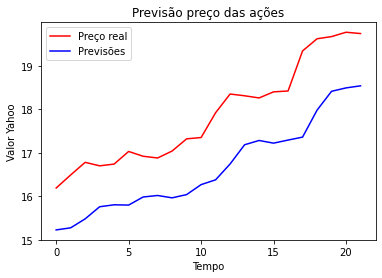

In [52]:
plt.plot(preco_real_teste,color = 'red',label = "Preço real")
plt.plot(previsoes,color ='blue',label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()